In [1]:
import os

import joblib
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Reading the csv

In [2]:
df = pd.read_csv("/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_1/diabetes.csv")

In [3]:
SAVE_DIR = "/Users/Bilal/PycharmProjects/LearningAI/models/assignment_7/task_1"
MODEL_PATH = f"{SAVE_DIR}/diabetes_model.keras"
SCALER_PATH = f"{SAVE_DIR}/scaler.pkl"
HISTORY_PATH = f"{SAVE_DIR}/history.pkl"


## Exploring the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df["Outcome"].unique()

array([1, 0])

## Scaling the data

In [8]:
numeric_features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI",
                    "DiabetesPedigreeFunction", "Age"]


In [9]:
scaler = MinMaxScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


## Splitting the data into Imput and output

In [11]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [12]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [13]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Splitting the Data into Training and Validation Sets

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, )

In [15]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 146 to 219
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    float64
 1   Glucose                   614 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             614 non-null    float64
 4   Insulin                   614 non-null    float64
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    float64
dtypes: float64(8)
memory usage: 43.2 KB


In [16]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 392 to 194
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               154 non-null    float64
 1   Glucose                   154 non-null    float64
 2   BloodPressure             154 non-null    float64
 3   SkinThickness             154 non-null    float64
 4   Insulin                   154 non-null    float64
 5   BMI                       154 non-null    float64
 6   DiabetesPedigreeFunction  154 non-null    float64
 7   Age                       154 non-null    float64
dtypes: float64(8)
memory usage: 10.8 KB


## Making the Model

In [17]:
model = tf.keras.Sequential([

    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

Making a new Model
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5065 - loss: 0.6954 - val_accuracy: 0.6688 - val_loss: 0.6820
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6466 - loss: 0.6758 - val_accuracy: 0.6688 - val_loss: 0.6633
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6466 - loss: 0.6653 - val_accuracy: 0.6688 - val_loss: 0.6564
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6466 - loss: 0.6612 - val_accuracy: 0.6688 - val_loss: 0.6507
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6466 - loss: 0.6579 - val_accuracy: 0.6688 - val_loss: 0.6475
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6466 - loss: 0.6556 - val_accuracy: 0.6688 - val_loss: 0.6444
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6466 - loss: 0.6528 - val_accuracy: 0.6688 - val_loss: 0.6404
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6466 - loss: 0.6494 - val_a

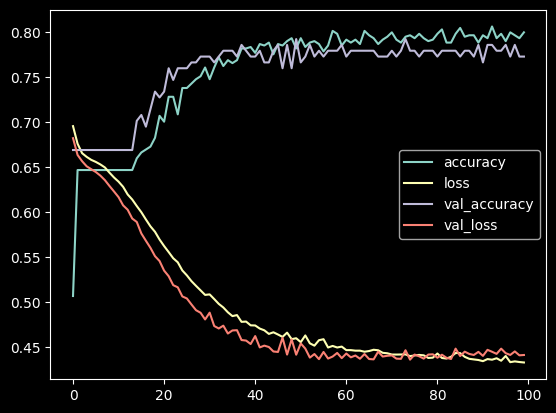

In [19]:
if os.path.exists(MODEL_PATH) and os.path.exists(SCALER_PATH) and os.path.exists(HISTORY_PATH):
    print("Loading Already Present Model")
    model = tf.keras.models.load_model(MODEL_PATH)
    scaler = joblib.load(SCALER_PATH)
    history = joblib.load(HISTORY_PATH)
    #evaulation
    pd.DataFrame(history).plot()

else:
    print("Making a new Model")

    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

    # saving the models
    model.save(MODEL_PATH)
    joblib.dump(scaler, SCALER_PATH)

    #savng history
    joblib.dump(history.history, HISTORY_PATH)

    #evaluation
    pd.DataFrame(history.history).plot()

## Confusion Matrix

In [20]:
# Make predictions
y_preds = model.predict(x_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[85, 18],
       [17, 34]])